Display the interactive output of matplotlib inline. Run the following command and the resulting plots will be saved in this notebook. If you do not need it, just keep it here and move to the next cell.

In [1]:
%matplotlib notebook

# Simulate single CPi model  

This tutorial describes how to get the basic information of a single cpi model and simulate a process using Juypter. You can follow the documents and run the code cell below to get the outputs you need.

## Load the single model of cpi

'singleSimulate' is a .py file to get the information of a single cpi model. You can also simulate the selected process with it. After it is imported, we can call the functions in this notebook.

In [2]:
import singleSimulate

## Select cpi file and process

The class 'Simulate()' in singleSimulate is to fetch and store the information in single cpi file. Once you load this class, you need to select an existing cpi file from local and select one of its process from the process list. Then a cpi model in Juypter is created.

In the following example, a model named 'cpi_model' will be created.

In [3]:
cpi_model = singleSimulate.Simulate()

Selected cpi file: abcd
Selected process: Pi


If you want to open other cpi files, it is better to create a new notebook for modeling. Rerun this cell is still acceptable, but their results might be mixed.

## View basic information 

After 'cpi_model' is created, basic information like the file name of this cpi file can be viewed and printed here.

Though the selected file name and process are printed once the model is created, they can also be reached by other functions. The example for filename is presented below. All the visible paramters are listed here: 

* filename

* process

* initial_concentrations

In [4]:
filename = cpi_model.filename
print filename

abcd


#### These functions will be explained in the following sections.
* view_definitions()   

* view_species()

* view_odes()

#### This can only be reached after simulation. If you attempt to print it before simulation, it will be an empty string.
* solution 

## View cpi definitions

With this function you can view all the contents in selected cpi file, which are the definitions of this model. All of its processes including the selected one will also be displayed here.

* view_definitions()

In [5]:
ode_def = cpi_model.view_definitions()

The cpi definitions of selected file are:

-- Simple reaction: A + B -> C + D



species A(a) = a.C();

species B(b) = b.D();

species C() = tau<1>.0;

species D() = tau<0>.D();



process Pi = [1] A(a) || [1] B(b) || [0] C() || [0] D()

           : {a-b@1};


## View species

With this function you can view all the species in selected process. Their names will be sorted alphabetically in ascending order and displayed as well.

* view_species()

In [6]:
species=cpi_model.view_species()

The species in selected process are:
ABCD


## View odes

With this function you can view the ordinary differential equations (odes) generated from selected process. Suppose there are m species in the selected process, they can also be reached by the 'view_species' function. The first m odes here describe the concentration change of the species in the model, and the additional odes are to describe their affinities. 

* view_odes()

In [7]:
odes=cpi_model.view_odes()

The odes of selected process are:

diff(x1(t), t) = -1.0 * x2 * x1;
diff(x2(t), t) = -1.0 * x2 * x1;
diff(x3(t), t) = -1.0 * x3 + x2 * x1;
diff(x4(t), t) = x2 * x1;


## Simulate the selected process

With this function you can solve the odes with selected solver and store the outputs of simulation. The outputs of first m odes will be plotted in the same figure to describe the concentration change of the species in the model. You can also choose to save the output figure or just display it in the notebook. 

* simulate_process(solver)
* show_plot(is_save)

The parameter 'solver' determines which ode solver will solve this process, you can select from these two:
* odeint
* GLIMDA

The default ode solver is 'odeint' and it can solve most of the models. If this solver dose not satifiy your demands or cannot solve this model, you can use the 'GLIMDA' solver. In this case, it may take about 3 to 5 minutes to solve this complex model.

The second parameter 'is_save' determines whether to save the simulation output of this process as a figure, you can enter 'Yes' or 'No'. The output figure will be saved in the same directory as this notebook. If you occasionally input 'No' but still want to save the simulation, you can click on the disk-like button under the interactive figure.

Once this function is called, you will need to enter three numbers in the pop-up windows: the time to start and end a process, and the number of points during this period. These parameters should be numerical and positive.

#### The last paramter (number of points) is optional. However, if you leave it as zero, this function will use the 'GLIMDA' solver by default even you select 'odeint' at the very beginning.

In [ ]:
simulate1 = cpi_model.simulate_process('odeint')

## Plot the simulation

Users can interact with the labels in the figure here. Click on the different line labels and their line styles will be changed.

The default sequence of line styles are: '-', '--', '-.', ':' and unvisiable. Once the users click on the relevant labels, it will change according to this sequence. However, if you occasion to make a line unvisiable, click the same area on the label may turn it into the original style.

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


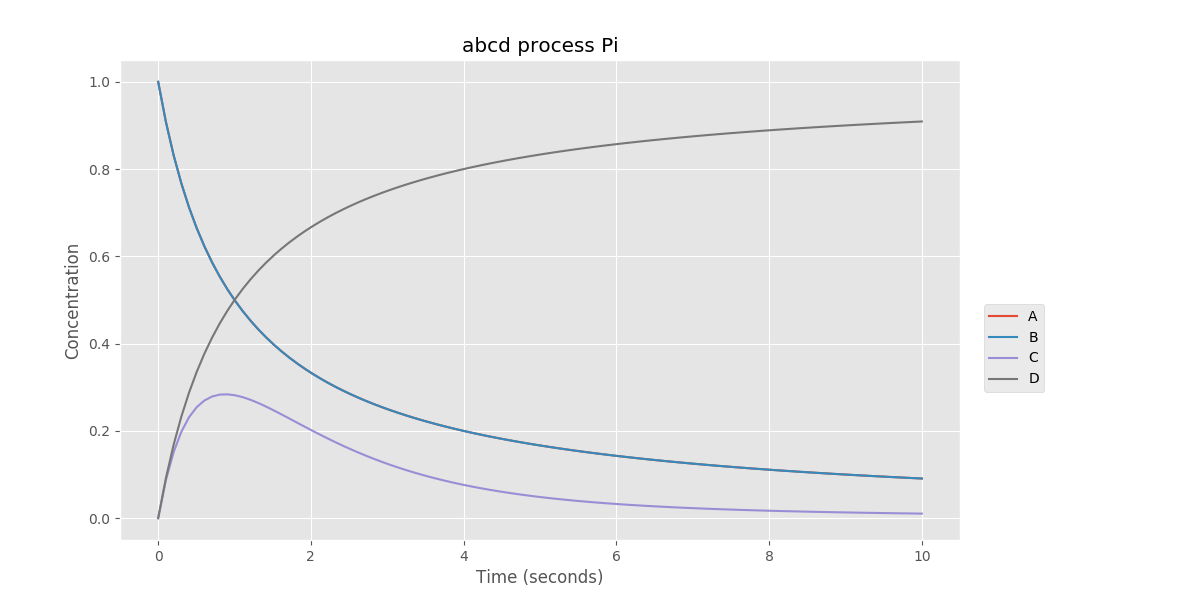

Picture will not be saved or you can change your selection.


In [4]:
plot1 = cpi_model.show_plot('No')

## View the numerical solution of simulation

With this function you can view the complete numerical results of simulation. If the number of odes is larger than the number of species in the selected process, the outputs which will not be plotted in the previous figure can be viewed here. 

* solution

In [9]:
num_solution = cpi_model.solution
print num_solution

[[ 1.          1.          0.          0.        ]
 [ 0.90825688  0.90825688  0.08712055  0.09174312]
 [ 0.83193278  0.83193278  0.15123908  0.16806722]
 [ 0.76744187  0.76744187  0.19796611  0.23255813]
 [ 0.71223022  0.71223022  0.23139509  0.28776978]
 [ 0.66442953  0.66442953  0.2545762   0.33557047]
 [ 0.62264151  0.62264151  0.2698209   0.37735849]
 [ 0.58579881  0.58579881  0.27890465  0.41420119]
 [ 0.55307262  0.55307262  0.2832061   0.44692738]
 [ 0.52380952  0.52380952  0.283805    0.47619048]
 [ 0.49748743  0.49748743  0.28155274  0.50251257]
 [ 0.47368421  0.47368421  0.27712409  0.52631579]
 [ 0.45205479  0.45205479  0.2710558   0.54794521]
 [ 0.43231441  0.43231441  0.26377584  0.56768559]
 [ 0.41422594  0.41422594  0.25562582  0.58577406]
 [ 0.39759036  0.39759036  0.24687836  0.60240964]
 [ 0.38223938  0.38223938  0.23775071  0.61776062]
 [ 0.36802974  0.36802974  0.22841549  0.63197026]
 [ 0.35483871  0.35483871  0.2190092   0.64516129]
 [ 0.34256056  0.34256056  0.20